In [1]:
import networkx as nx   
import matplotlib.pyplot as plt  
from pyoxigraph import *
import chromadb
from pprint import pprint
from adjustText import adjust_text 
#from embedding_pipeline import *
from RDF import RDF
from OWL import OWL
from RDFS import RDFS
from Nodes import *
from utils import get_descendents, get_subclasses, get_complement, get_dom_ran, get_classes_list
from embedding import get_classes, create_hierarchy_graph, create_core_graph

In [2]:
file = "/home/kipp_sa/github/EmbedAlign/test/bfo-core.owl"
store = Store()
store.load(path = file, format = RdfFormat.RDF_XML)

Client = chromadb.Client()
label_collection = Client.get_or_create_collection(name="labels")
structure_collection = Client.get_or_create_collection(name = "Structure")

In [3]:
def hierarchy_pos(G, root, width=1.0, vert_gap=0.2, vert_loc=0, xcenter=0.5):
    '''
    If G is a tree, this will return a dict of positions for a hierarchical layout.

    G: the graph (must be a tree)
    root: the root node
    width: horizontal space allocated for this branch
    vert_gap: gap between levels
    vert_loc: vertical location of root
    xcenter: horizontal location of root
    '''
    def _hierarchy_pos(G, root, left, right, vert_loc, pos=None, parent=None):
        if pos is None:
            pos = {}
        pos[root] = ((left + right) / 2, vert_loc)
        neighbors = list(G.neighbors(root))
        if parent:
            neighbors = [n for n in neighbors if n != parent]
        if neighbors:
            dx = (right - left) / len(neighbors)
            nextx = left
            for neighbor in neighbors:
                next_right = nextx + dx
                pos = _hierarchy_pos(G, neighbor, nextx, next_right, vert_loc - vert_gap, pos, root)
                nextx += dx
        return pos

    return _hierarchy_pos(G, root, 0, width, vert_loc)

In [4]:
classes = list(get_classes(store))
named = [c for c in classes if isinstance(c,NamedClass)]
blanks = [c for c in classes if c not in named]
for c in blanks:
    print(c)

<http://purl.obolibrary.org/obo/BFO_0000142> | <http://purl.obolibrary.org/obo/BFO_0000147>
<http://purl.obolibrary.org/obo/BFO_0000029> | <http://purl.obolibrary.org/obo/BFO_0000040> | <http://purl.obolibrary.org/obo/BFO_0000140>
<http://purl.obolibrary.org/obo/BFO_0000038> | <http://purl.obolibrary.org/obo/BFO_0000148>
<http://purl.obolibrary.org/obo/BFO_0000015> | <http://purl.obolibrary.org/obo/BFO_0000035>
<http://purl.obolibrary.org/obo/BFO_0000015> | <http://purl.obolibrary.org/obo/BFO_0000035>
<http://purl.obolibrary.org/obo/BFO_0000029> | <http://purl.obolibrary.org/obo/BFO_0000140>
<http://purl.obolibrary.org/obo/BFO_0000029> | <http://purl.obolibrary.org/obo/BFO_0000040>
<http://purl.obolibrary.org/obo/BFO_0000018> | <http://purl.obolibrary.org/obo/BFO_0000026>
<http://purl.obolibrary.org/obo/BFO_0000015> | <http://purl.obolibrary.org/obo/BFO_0000035>
<http://purl.obolibrary.org/obo/BFO_0000009> | <http://purl.obolibrary.org/obo/BFO_0000018> | <http://purl.obolibrary.org/obo

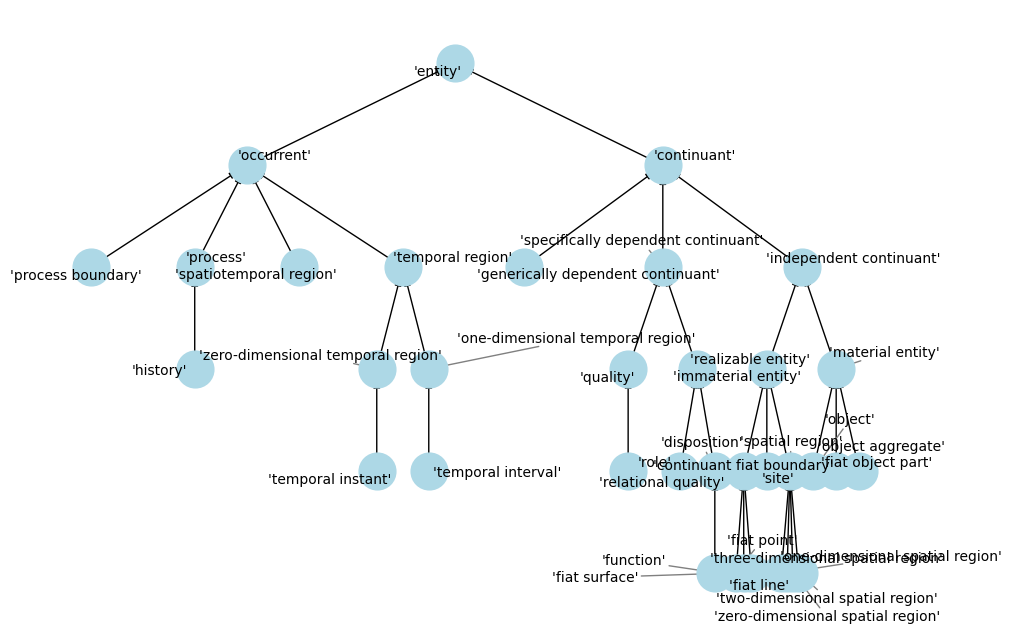

In [5]:

graph = create_hierarchy_graph(named)
def plot_hierarchy(graph):
    sinks = [n for n, d in graph.out_degree() if d == 0]
    if len(sinks) != 1:
        raise ValueError("Graph must have exactly one sink node")
    sink = sinks[0]

    G_rev = graph.reverse()
    pos = hierarchy_pos(G_rev, root=sink)

    # Scale positions to increase spacing
    scale_factor = 2  # tweak this as needed
    pos = {k: (v[0]*scale_factor, v[1]*scale_factor) for k,v in pos.items()}

    plt.figure(figsize=(12, 8))
    nx.draw_networkx_nodes(graph, pos, node_size=700, node_color='lightblue')
    nx.draw_networkx_edges(graph, pos, arrows=True)

    # Draw labels separately and use adjustText to prevent overlaps
    texts = []
    for node, (x, y) in pos.items():
        texts.append(plt.text(x, y, str(node), fontsize=10, ha='center', va='center'))

    adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray'))

    plt.axis('off')
    plt.show()
plot_hierarchy(graph)



In [6]:
for c in graph.nodes:
    print(c)

'temporal instant'
'temporal interval'
'history'
'zero-dimensional temporal region'
'fiat point'
'fiat surface'
'relational quality'
'fiat line'
'immaterial entity'
'continuant fiat boundary'
'material entity'
'one-dimensional temporal region'
'process boundary'
'function'
'generically dependent continuant'
'object'
'site'
'three-dimensional spatial region'
'object aggregate'
'one-dimensional spatial region'
'fiat object part'
'role'
'specifically dependent continuant'
'quality'
'zero-dimensional spatial region'
'realizable entity'
'disposition'
'process'
'spatiotemporal region'
'two-dimensional spatial region'
'temporal region'
'spatial region'
'independent continuant'
'occurrent'
'continuant'
'entity'


In [7]:
core = create_core_graph(graph, blanks)
for n in graph.nodes:
    print(n)

'temporal instant'
'temporal interval'
'history'
'zero-dimensional temporal region'
'fiat point'
'fiat surface'
'relational quality'
'fiat line'
'immaterial entity'
'continuant fiat boundary'
'material entity'
'one-dimensional temporal region'
'process boundary'
'function'
'generically dependent continuant'
'object'
'site'
'three-dimensional spatial region'
'object aggregate'
'one-dimensional spatial region'
'fiat object part'
'role'
'specifically dependent continuant'
'quality'
'zero-dimensional spatial region'
'realizable entity'
'disposition'
'process'
'spatiotemporal region'
'two-dimensional spatial region'
'temporal region'
'spatial region'
'independent continuant'
'occurrent'
'continuant'
'entity'
<http://purl.obolibrary.org/obo/BFO_0000142> | <http://purl.obolibrary.org/obo/BFO_0000147>
<http://purl.obolibrary.org/obo/BFO_0000029> | <http://purl.obolibrary.org/obo/BFO_0000040> | <http://purl.obolibrary.org/obo/BFO_0000140>
<http://purl.obolibrary.org/obo/BFO_0000038> | <http://p

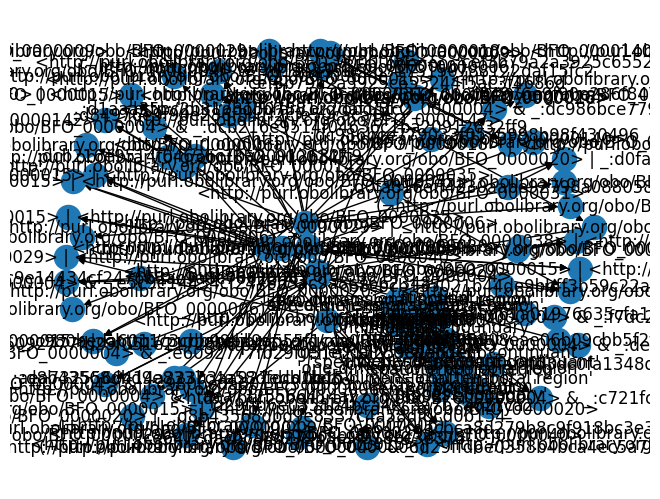

In [11]:
nx.draw(core, with_labels = True)